# Hand Written Digits Project

Data reference link : https://datahub.io/machine-learning/pendigits#readme

# Exploratory Data Analysis and Visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('pendigits_txt.csv')

In [ ]:
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [ ]:
df.isnull().sum()

input1     0
input2     0
input3     0
input4     0
input5     0
input6     0
input7     0
input8     0
input9     0
input10    0
input11    0
input12    0
input13    0
input14    0
input15    0
input16    0
class      0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.0,38.814320,34.257783,0.0,6.0,32.0,65.0,100.0
input2,10992.0,85.120269,16.218571,0.0,76.0,89.0,100.0,100.0
input3,10992.0,40.605622,26.342984,0.0,20.0,40.0,58.0,100.0
input4,10992.0,83.774199,19.163646,0.0,72.0,91.0,100.0,100.0
input5,10992.0,49.770378,34.100515,0.0,18.0,53.0,78.0,100.0
input6,10992.0,65.573144,26.996688,0.0,49.0,71.0,86.0,100.0
input7,10992.0,51.220251,30.576881,0.0,28.0,53.5,74.0,100.0
input8,10992.0,44.498999,29.906104,0.0,23.0,43.0,64.0,100.0
input9,10992.0,56.868541,34.135530,0.0,29.0,60.0,89.0,100.0
input10,10992.0,33.695961,27.251548,0.0,7.0,33.0,54.0,100.0


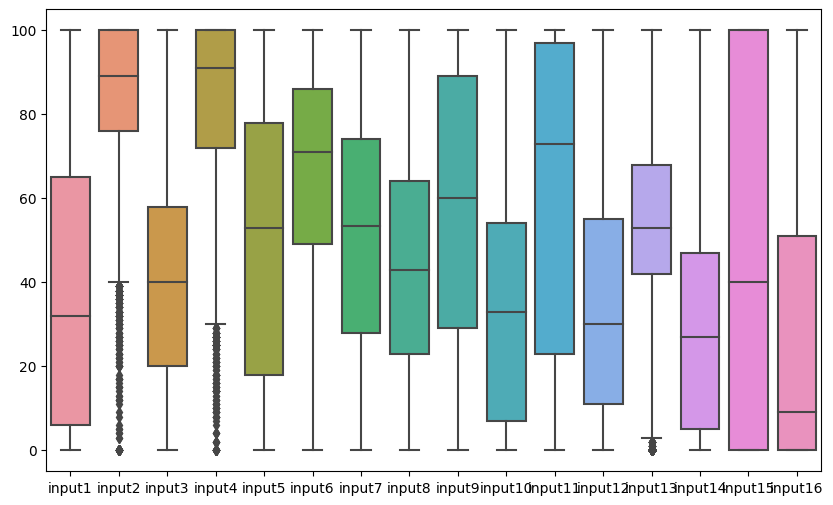

In [ ]:
# Aykırı değerlerin incelenmesi
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(['class'], axis=1))
plt.show()

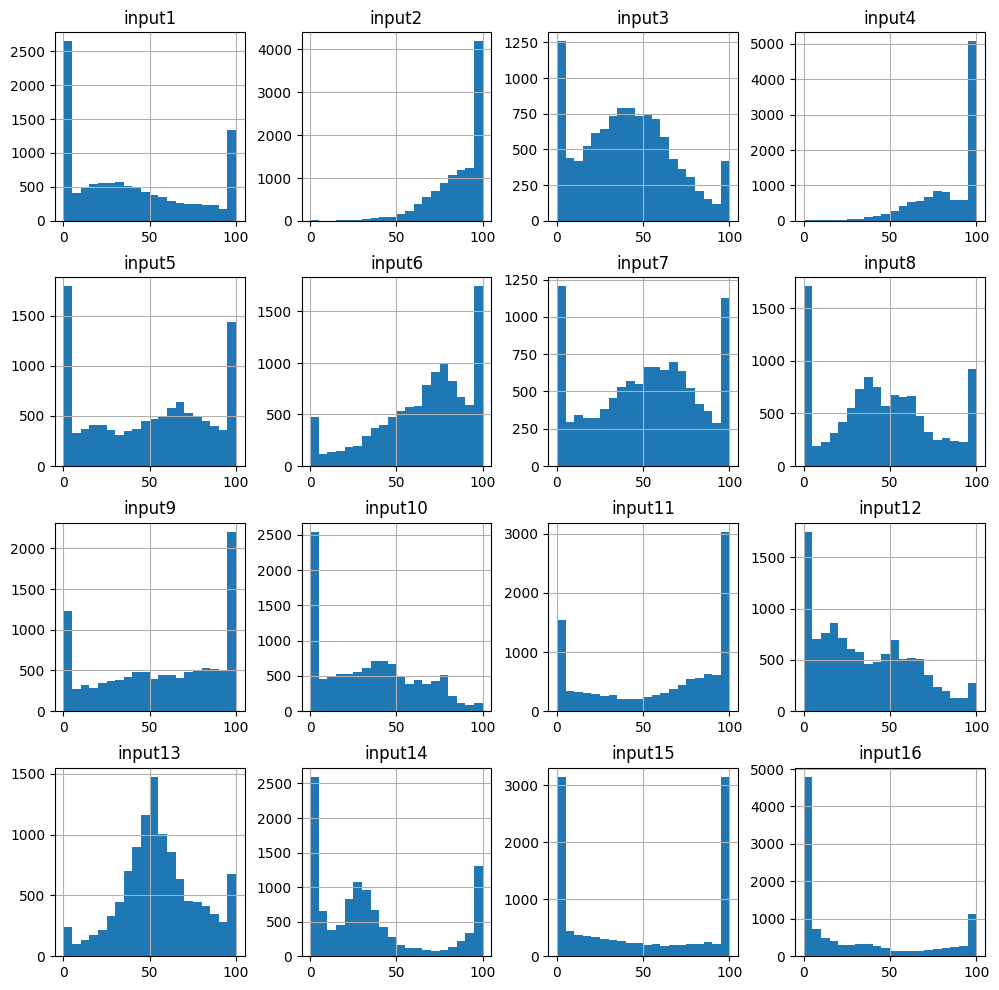

In [ ]:
df.drop(['class'], axis=1).hist(figsize=(12, 12), bins=20)
plt.show()

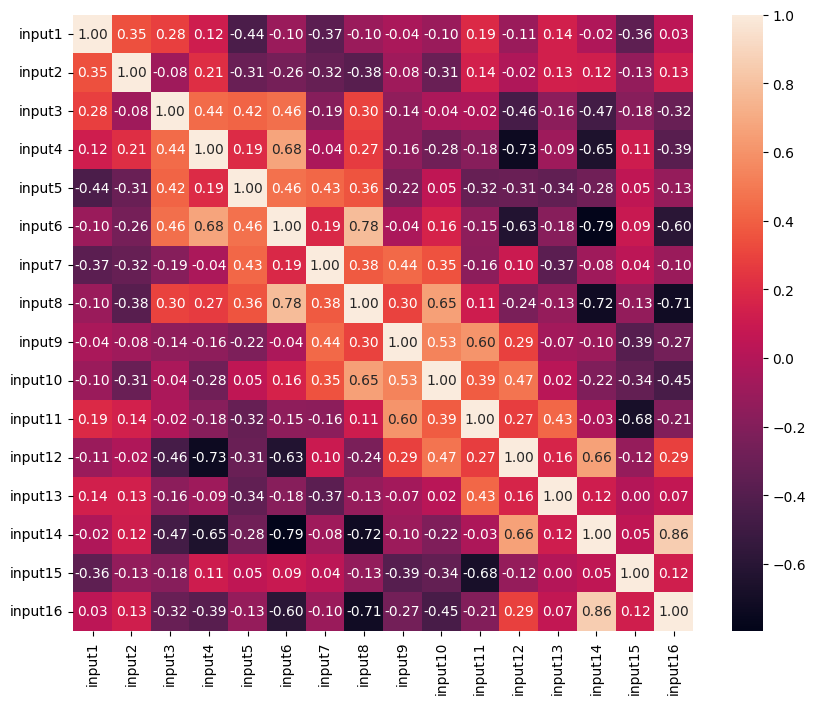

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(['class'], axis=1).corr(), annot=True, fmt=".2f")
plt.show()

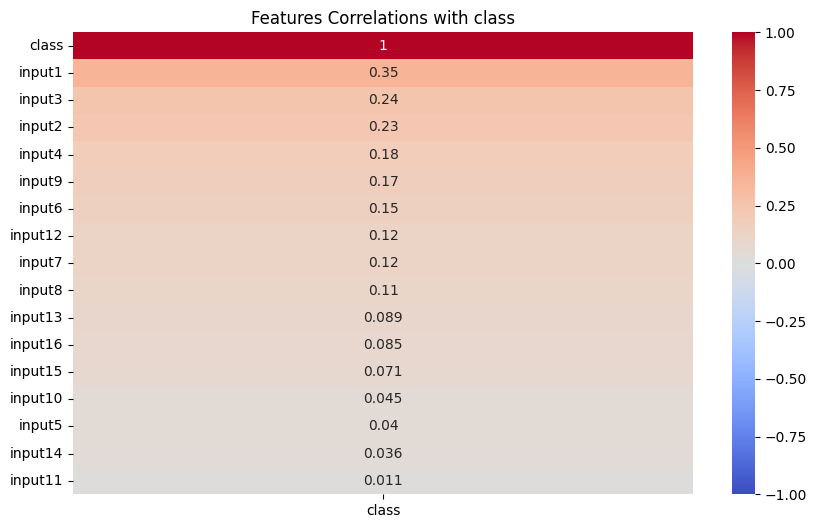

In [ ]:
target_column = 'class'
corr_matrix = df.corr()
corr_with_target = corr_matrix[target_column].apply(np.abs).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title(f'Features Correlations with {target_column}')
plt.show()

Check multicollinearity

In [ ]:
df.corr()[(df.corr() >= 0.9)  & (df.corr() < 1)].any().any()

False

In [ ]:
df["class"].nunique()

10

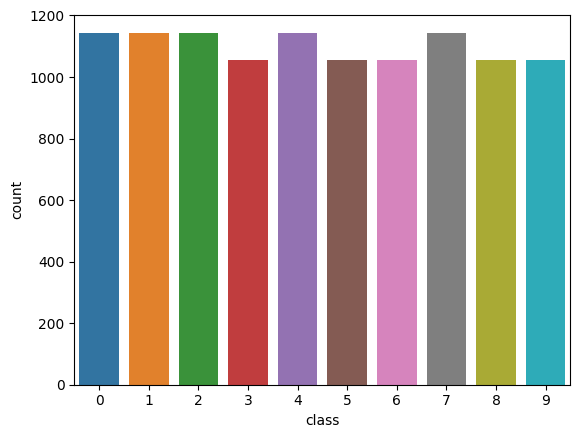

In [ ]:
sns.countplot(x="class", data = df);

X and Target

In [ ]:
X=df.drop(["class"],axis=1)
y=df["class"]

# Support Vector Machine (SVM) Classifier

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state = 42))]
pipe_model = Pipeline(steps=operations)

In [ ]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[229   0   0   0   0   0   0   0   0   0]
 [  0 221   3   3   0   0   0   2   0   0]
 [  0   1 227   0   0   0   0   1   0   0]
 [  0   0   1 209   0   0   0   1   0   0]
 [  0   0   0   0 229   0   0   0   0   0]
 [  0   0   0   2   0 209   0   0   0   0]
 [  0   0   0   0   0   0 211   0   0   0]
 [  0   0   0   0   0   0   0 228   0   0]
 [  0   0   0   0   0   0   0   0 211   0]
 [  0   1   0   0   0   0   0   1   0 209]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      0.97      0.98       229
           2       0.98      0.99      0.99       229
           3       0.98      0.99      0.98       211
           4       1.00      1.00      1.00       229
           5       1.00      0.99      1.00       211
           6       1.00      1.00      1.00       211
           7       0.98      1.00      0.99       228
           8       1.00      1.00      1.00       211
           9       

# Decision Tree (DT) Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT_model = DecisionTreeClassifier(random_state = 101)

In [ ]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [ ]:
y_pred = DT_model.predict(X_test)

## Model Performance

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

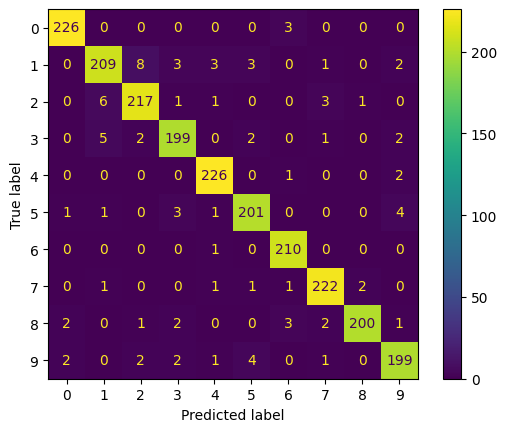

In [ ]:
ConfusionMatrixDisplay.from_estimator(DT_model, X_test, y_test);

In [ ]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[226   0   0   0   0   0   3   0   0   0]
 [  0 209   8   3   3   3   0   1   0   2]
 [  0   6 217   1   1   0   0   3   1   0]
 [  0   5   2 199   0   2   0   1   0   2]
 [  0   0   0   0 226   0   1   0   0   2]
 [  1   1   0   3   1 201   0   0   0   4]
 [  0   0   0   0   1   0 210   0   0   0]
 [  0   1   0   0   1   1   1 222   2   0]
 [  2   0   1   2   0   0   3   2 200   1]
 [  2   0   2   2   1   4   0   1   0 199]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       229
           1       0.94      0.91      0.93       229
           2       0.94      0.95      0.95       229
           3       0.95      0.94      0.95       211
           4       0.97      0.99      0.98       229
           5       0.95      0.95      0.95       211
           6       0.96      1.00      0.98       211
           7       0.97      0.97      0.97       228
           8       0.99      0.95      0.97       211
           9       

In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [ ]:
DT_model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(DT_model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"],
                        cv = 10,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_micro,train_precision_micro,test_recall_micro,train_recall_micro,test_f1_micro,train_f1_micro
1,0.068012,0.007493,0.954545,1.0,0.954545,1.0,0.954545,1.0,0.954545,1.0
2,0.050374,0.006709,0.957955,1.0,0.957955,1.0,0.957955,1.0,0.957955,1.0
3,0.050272,0.006337,0.959091,1.0,0.959091,1.0,0.959091,1.0,0.959091,1.0
4,0.158671,0.030497,0.957907,1.0,0.957907,1.0,0.957907,1.0,0.957907,1.0
5,0.191967,0.026282,0.964733,1.0,0.964733,1.0,0.964733,1.0,0.964733,1.0
6,0.051169,0.006220,0.956769,1.0,0.956769,1.0,0.956769,1.0,0.956769,1.0
7,0.048720,0.007819,0.952218,1.0,0.952218,1.0,0.952218,1.0,0.952218,1.0
8,0.049469,0.006283,0.949943,1.0,0.949943,1.0,0.949943,1.0,0.949943,1.0
9,0.048256,0.006588,0.962457,1.0,0.962457,1.0,0.962457,1.0,0.962457,1.0
10,0.049062,0.006680,0.969283,1.0,0.969283,1.0,0.969283,1.0,0.969283,1.0


In [ ]:
df_scores.mean()[2:]

test_accuracy            0.95849
train_accuracy           1.00000
test_precision_micro     0.95849
train_precision_micro    1.00000
test_recall_micro        0.95849
train_recall_micro       1.00000
test_f1_micro            0.95849
train_f1_micro           1.00000
dtype: float64

In [ ]:
DT_model.fit(X_train, y_train)
DT_model.feature_importances_

array([0.07458358, 0.06614073, 0.03082137, 0.05971202, 0.08127571,
       0.0267852 , 0.0310216 , 0.01944677, 0.07854567, 0.11495663,
       0.07814802, 0.00860267, 0.03436312, 0.11653833, 0.08984978,
       0.0892088 ])

In [ ]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_,
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
input12,0.008603
input8,0.019447
input6,0.026785
input3,0.030821
input7,0.031022
input13,0.034363
input4,0.059712
input2,0.066141
input1,0.074584
input11,0.078148


In [ ]:
from sklearn.tree import plot_tree

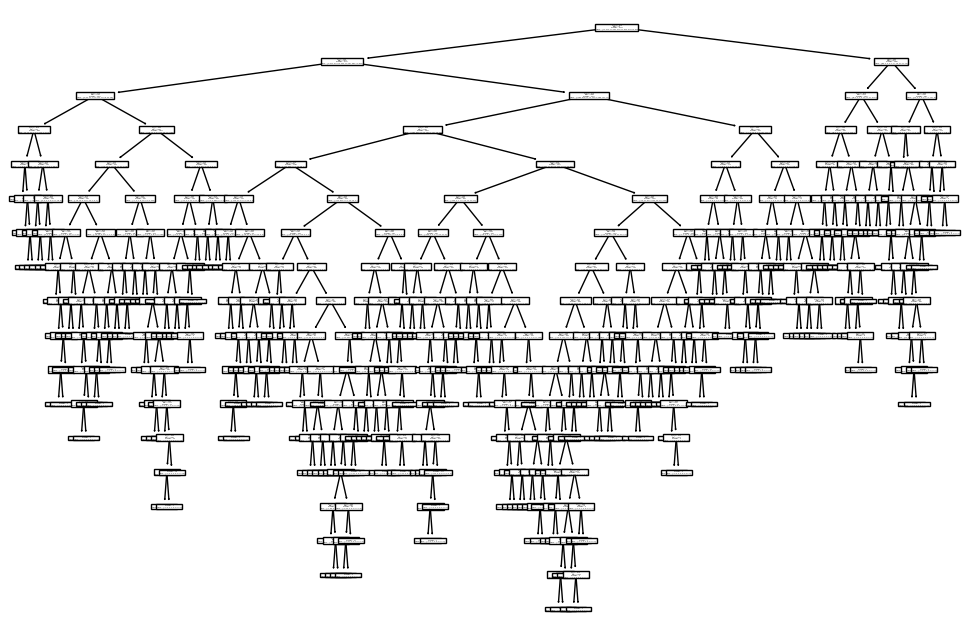

In [ ]:
plt.figure(figsize = (12,8))

plot_tree(DT_model);

In [ ]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, class_names=df["class"].unique().astype(str));

In [ ]:
pruned_tree = DecisionTreeClassifier(max_depth=11, random_state=101)
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, random_state=101)



Test Set
[[225   0   0   0   0   0   2   0   1   1]
 [  0 209   8   3   2   3   3   0   0   1]
 [  0   4 221   1   0   0   2   0   1   0]
 [  0   3   2 202   0   2   0   1   0   1]
 [  0   0   0   1 225   1   0   1   0   1]
 [  1   1   0   3   0 200   1   0   0   5]
 [  0   0   0   0   1   0 210   0   0   0]
 [  0   3   1   0   1   1   0 220   2   0]
 [  1   0   1   2   0   0   1   3 202   1]
 [  1   0   0   6   1   2   0   0   0 201]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       229
           1       0.95      0.91      0.93       229
           2       0.95      0.97      0.96       229
           3       0.93      0.96      0.94       211
           4       0.98      0.98      0.98       229
           5       0.96      0.95      0.95       211
           6       0.96      1.00      0.98       211
           7       0.98      0.96      0.97       228
           8       0.98      0.96      0.97       211
           9   

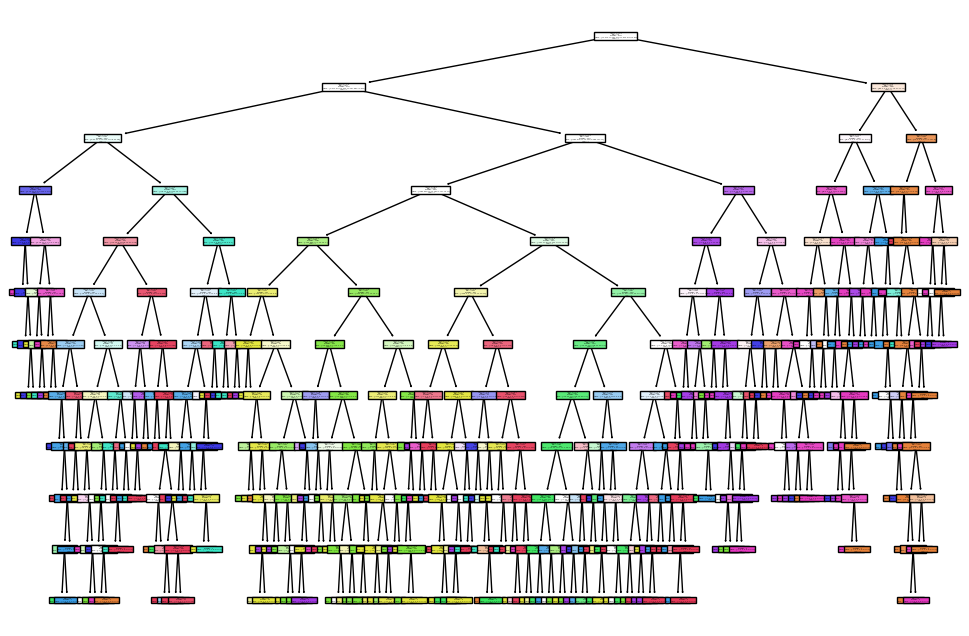

In [ ]:
report_model(pruned_tree)

In [ ]:
pruned_tree_2 = DecisionTreeClassifier(max_leaf_nodes=90, random_state=101) #leafnode sayısı
pruned_tree_2.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=90, random_state=101)



Test Set
[[224   0   0   0   1   0   3   0   1   0]
 [  0 197  18   3   1   2   2   0   0   6]
 [  0   4 219   2   0   0   1   2   1   0]
 [  0   1   2 200   0   3   0   2   1   2]
 [  0   1   0   0 217   5   1   1   0   4]
 [  1   0   0   3   0 198   2   1   0   6]
 [  4   1   0   0   2   0 202   0   2   0]
 [  1   4   2   0   0   0   0 217   3   1]
 [  3   2   0   3   0   2   3   3 195   0]
 [  0   3   0   3   1   5   0   2   1 196]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       229
           1       0.92      0.86      0.89       229
           2       0.91      0.96      0.93       229
           3       0.93      0.95      0.94       211
           4       0.98      0.95      0.96       229
           5       0.92      0.94      0.93       211
           6       0.94      0.96      0.95       211
           7       0.95      0.95      0.95       228
           8       0.96      0.92      0.94       211
           9   

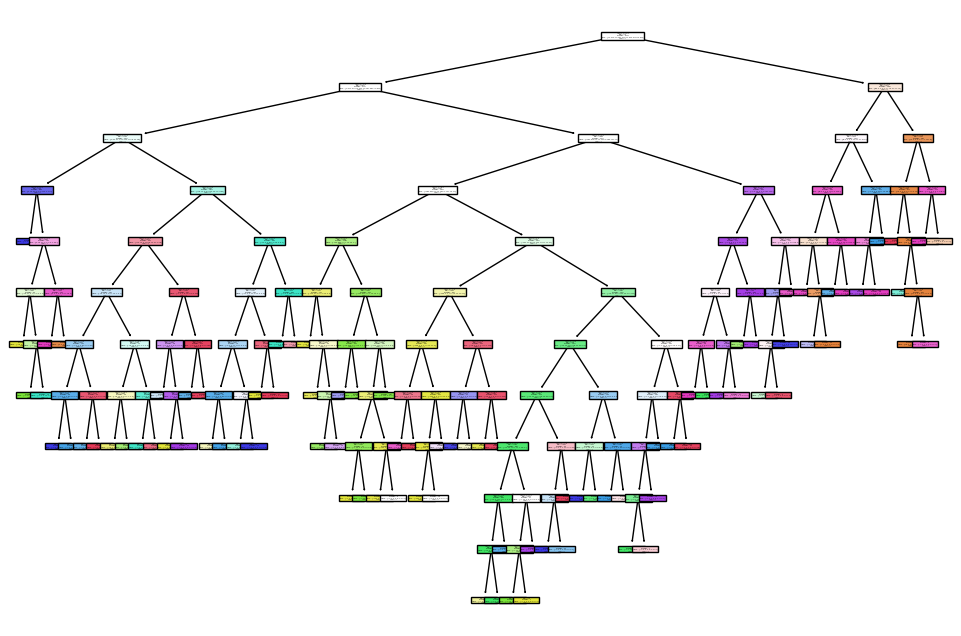

In [ ]:
report_model(pruned_tree_2)



Test Set
[[223   0   0   0   1   0   4   0   0   1]
 [  0 213   6   3   2   3   0   0   1   1]
 [  0   9 215   1   1   0   0   2   1   0]
 [  0   6   2 199   0   1   0   1   1   1]
 [  0   1   0   1 220   4   1   1   0   1]
 [  1   2   0   4   0 199   0   0   0   5]
 [  0   1   0   0   1   0 207   0   2   0]
 [  0   3   1   0   0   1   0 219   3   1]
 [  4   0   0   2   0   0   3   3 198   1]
 [  1   1   2   2   3   3   0   1   0 198]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       229
           1       0.90      0.93      0.92       229
           2       0.95      0.94      0.95       229
           3       0.94      0.94      0.94       211
           4       0.96      0.96      0.96       229
           5       0.94      0.94      0.94       211
           6       0.96      0.98      0.97       211
           7       0.96      0.96      0.96       228
           8       0.96      0.94      0.95       211
           9   

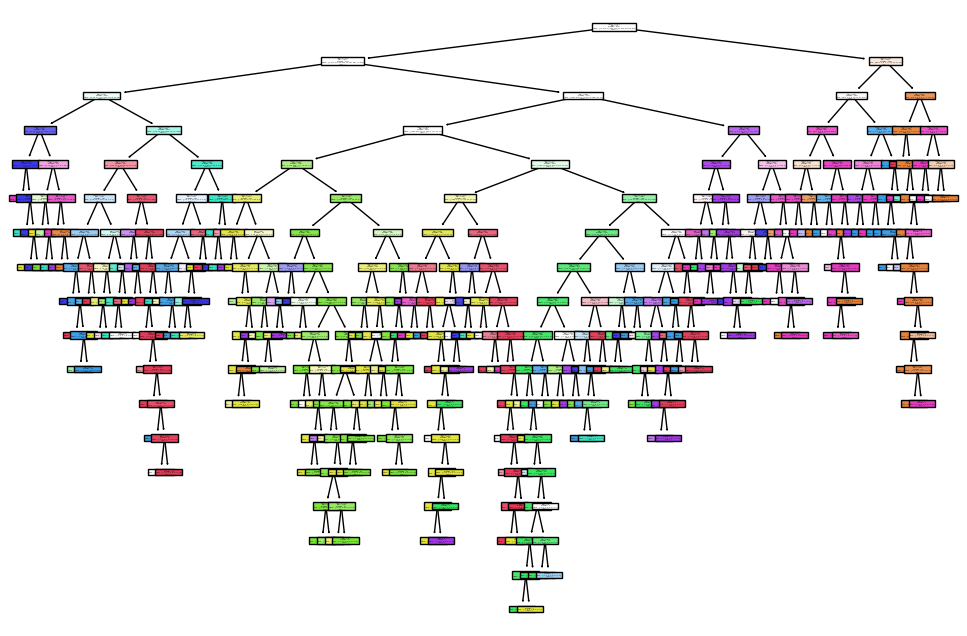

In [ ]:
pruned_tree_3 = DecisionTreeClassifier(min_samples_split=13, random_state=101)
pruned_tree_3.fit(X_train, y_train)
report_model(pruned_tree_3)

Find Best Parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model_selection = DecisionTreeClassifier(random_state=101)

In [ ]:
param_grid = {
    "splitter": ["best", "random"],
    "max_features": [None, "auto", "log2", 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    "max_depth": [None, 9, 10, 11, 12, 13, 14, 15],
    "min_samples_leaf": [ 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "min_samples_split": [12,13,14,15]
}

In [ ]:
grid_model = GridSearchCV(estimator=model_selection,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)

In [ ]:
grid_model.fit(X_train, y_train)



GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 9, 10, 11, 12, 13, 14, 15],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                              15],
                         'min_samples_split': [12, 13, 14, 15],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [ ]:
grid_model.best_params_

{'max_depth': 11,
 'max_features': 13,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'splitter': 'best'}

In [ ]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[223   1   0   0   0   0   3   0   1   1]
 [  0 205  10   5   0   2   2   2   2   1]
 [  0  10 214   0   0   0   1   4   0   0]
 [  0   4   1 204   0   0   0   1   0   1]
 [  3   2   0   0 217   3   1   1   0   2]
 [  0   0   0   2   0 204   1   0   1   3]
 [  1   1   0   0   1   0 208   0   0   0]
 [  0   1   0   1   1   1   2 221   1   0]
 [  4   3   0   0   0   0   0   3 199   2]
 [  1   2   0   1   1   2   0   3   0 201]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       229
           1       0.90      0.90      0.90       229
           2       0.95      0.93      0.94       229
           3       0.96      0.97      0.96       211
           4       0.99      0.95      0.97       229
           5       0.96      0.97      0.96       211
           6       0.95      0.99      0.97       211
           7       0.94      0.97      0.95       228
           8       0.98      0.94      0.96       211
           9       